In [25]:
import pandas as pd
import numpy as np

In [40]:
prod_filename = 'sport-5-ruleset-Baseball-fixture-3055309481-0-0-audit_marketId=2504&selectionId=250400000003&relatedParticipantId=5510582'
uat_filename = 'sport-5-ruleset-Baseball-fixture-3055309481-0-0-audit?marketId=2504&selectionId=250400000003&relatedParticipantId=5510582'
prod_data_csv = pd.read_csv(f"/Users/sara.hippmann/Downloads/{prod_filename}.csv")
uat_data_csv = pd.read_csv(f"/Users/sara.hippmann/Downloads/{uat_filename}.csv")

In [34]:
prod_data_csv.drop(columns=['isPreMatch', 'confidence', 'displayed', 'open', 'openForCashout', 'localTime'], inplace=True)
uat_data_csv.drop(columns=['isPreMatch', 'confidence', 'displayed', 'open', 'openForCashout', 'localTime'], inplace=True)
uat_data_csv['datetime'] = pd.to_datetime(uat_data_csv['time'])
prod_data_csv['datetime'] = pd.to_datetime(prod_data_csv['time'])
prod_data_csv.drop(columns=['time'], inplace=True)
uat_data_csv.drop(columns=['time'], inplace=True)

In [35]:
combined_df = pd.merge_asof(prod_data_csv, uat_data_csv, on='datetime', direction='forward')

In [36]:
combined_df.columns = ['prod_corr_ID', 'prod_price', 'datetime', 'uat_corr_ID', 'uat_price']

In [37]:
combined_df['prod_prob'] = 1/combined_df['prod_price']
combined_df['uat_prob'] = 1/combined_df['uat_price']

In [38]:
#input threshold for flags based on change in demargination as current probability - (specific market) probability
threshold = 0.005
#input confidence interval based on marginated over/under prices
upper_bound_level = 0.002
lower_bound_level = 0.002
combined_df['prob_diff'] = combined_df['prod_prob'] - combined_df['uat_prob']
combined_df

,prod_corr_ID,prod_price,datetime,uat_corr_ID,uat_price,prod_prob,uat_prob,prob_diff
0,78061d33-0682-49b3-b61a-4f127ce2e9b5,14.25,2025-08-15 03:18:02.258000+00:00,e54ab82c-cca0-4531-be32-f3c108c73544,14.35,0.070175,0.069686,0.000489
1,d7edc862-3dfa-4844-a703-70e8bb5fe8d3,12.25,2025-08-15 03:56:39.495000+00:00,aaa3d85b-edf6-446e-827a-1aa2e6ca6451,15.02,0.081633,0.066578,0.015055
2,145b6f86-b289-4cdb-a22b-2d46ad0232c4,12.58,2025-08-15 04:11:18.787000+00:00,9c5c4015-eeec-4cac-b1c0-8fc7f53fcbf1,12.56,0.079491,0.079618,-0.000127
3,601bb951-9be4-4530-8ebc-2b21fcbb9294,12.79,2025-08-15 04:11:38.467000+00:00,48b786d5-368f-43da-b88a-a1c6da416c9e,13.07,0.078186,0.076511,0.001675
4,c224f9f5-a344-4d4a-bd6d-089bc206f98a,12.17,2025-08-15 04:12:09.561000+00:00,3f452936-32ae-4cfd-8975-10e094bf2b7b,14.35,0.082169,0.069686,0.012483
5,762d4674-7e06-4a31-9aa1-a13ff8e5239b,11.81,2025-08-15 04:12:21.319000+00:00,66766117-42e0-4b92-8bf0-743ea3aa069a,13.95,0.084674,0.071685,0.012989
6,232297b4-aee2-4c75-bdc9-22dd770bfeb7,12.52,2025-08-15 04:12:47.953000+00:00,66766117-42e0-4b92-8bf0-743ea3aa069a,13.95,0.079872,0.071685,0.008188
7,93efe2cf-2b36-49bb-95be-ba2dc07da61f,13.21,2025-08-15 04:13:20.590000+00:00,b0661904-e7b9-41c6-8dbb-dc901f9db38f,14.49,0.075700,0.069013,0.006687
8,dbbf0386-868b-480a-8cda-7830266e6014,13.21,2025-08-15 04:13:45.532000+00:00,74da4bb1-345d-4c0b-aa40-30bfbbf18e88,14.03,0.075700,0.071276,0.004424
9,8ce852d1-3514-4d79-8e85-d40e4ec1e6ae,13.32,2025-08-15 04:15:34.531000+00:00,734e7cef-73d4-4e84-989b-316e9c60f009,14.16,0.075075,0.070621,0.004454


<Axes: >

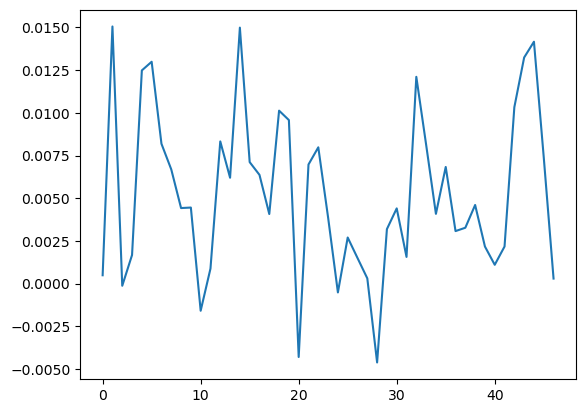

In [39]:
combined_df['prob_diff'].plot()